In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: DCR-USD
Start: 2021-01-22 17:00:00+00:00, End: 2021-03-22 14:30:00+00:00
Training data: 1288 
Tsesting data: 1289 


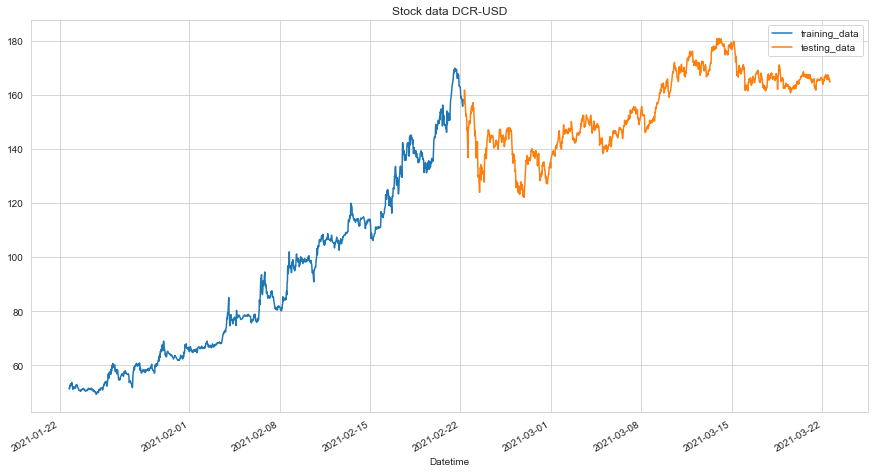

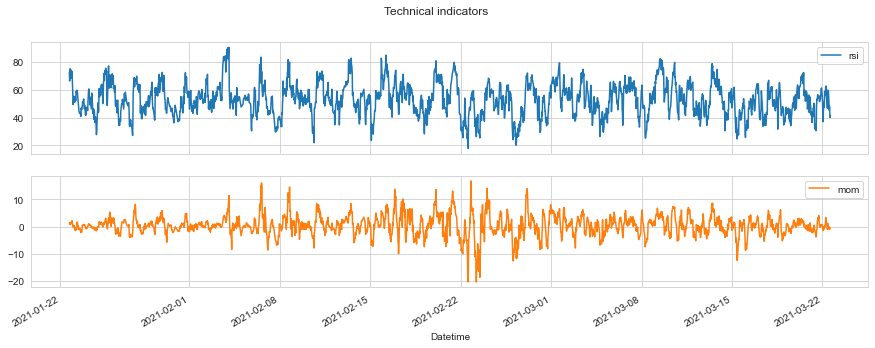

In [2]:
stock_name = 'dcr-usd'.upper()
industry = 'Cryptocurrency'
stock_data = pd.read_csv(f'data/{stock_name}.csv', index_col=['Datetime'], parse_dates=True)
n_train = len(stock_data)//2

train_data = stock_data.iloc[:n_train]
test_data = stock_data.iloc[n_train:]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1537.80, duration: 0:00:00.230044
episode: 2/2000, episode end value: 1552.12, duration: 0:00:00.213057
episode: 3/2000, episode end value: 1596.44, duration: 0:00:00.200047
episode: 4/2000, episode end value: 1615.42, duration: 0:00:00.204052
episode: 5/2000, episode end value: 1589.02, duration: 0:00:00.204040
episode: 6/2000, episode end value: 1569.19, duration: 0:00:00.189040
episode: 7/2000, episode end value: 1558.03, duration: 0:00:00.204045
episode: 8/2000, episode end value: 1563.09, duration: 0:00:00.201058
episode: 9/2000, episode end value: 1600.08, duration: 0:00:00.207029
episode: 10/2000, episode end value: 1556.54, duration: 0:00:00.190041
episode: 11/2000, episode end value: 1586.92, duration: 0:00:00.184042
episode: 12/2000, episode end value: 1536.23, duration: 0:00:00.207050
episode: 13/2000, episode end value: 1565.88, duration: 0:00:00.169044
episode: 14/2000, episode end value: 1556.12, duration: 0:00:00.187030
episode: 15/200

episode: 117/2000, episode end value: 1547.82, duration: 0:00:00.232066
episode: 118/2000, episode end value: 1545.31, duration: 0:00:00.255055
episode: 119/2000, episode end value: 1545.27, duration: 0:00:00.238048
episode: 120/2000, episode end value: 1548.60, duration: 0:00:00.232052
episode: 121/2000, episode end value: 1543.33, duration: 0:00:00.228036
episode: 122/2000, episode end value: 1547.55, duration: 0:00:00.224058
episode: 123/2000, episode end value: 1551.38, duration: 0:00:00.242057
episode: 124/2000, episode end value: 1544.83, duration: 0:00:00.245052
episode: 125/2000, episode end value: 1551.92, duration: 0:00:00.243067
episode: 126/2000, episode end value: 1546.89, duration: 0:00:00.248055
episode: 127/2000, episode end value: 1547.99, duration: 0:00:00.251074
episode: 128/2000, episode end value: 1550.56, duration: 0:00:00.242066
episode: 129/2000, episode end value: 1543.20, duration: 0:00:00.251052
episode: 130/2000, episode end value: 1538.41, duration: 0:00:00

episode: 231/2000, episode end value: 1549.50, duration: 0:00:00.272062
episode: 232/2000, episode end value: 1541.64, duration: 0:00:00.293079
episode: 233/2000, episode end value: 1551.95, duration: 0:00:00.294069
episode: 234/2000, episode end value: 1537.18, duration: 0:00:00.265058
episode: 235/2000, episode end value: 1542.64, duration: 0:00:00.262058
episode: 236/2000, episode end value: 1552.59, duration: 0:00:00.261040
episode: 237/2000, episode end value: 1547.35, duration: 0:00:00.297066
episode: 238/2000, episode end value: 1541.35, duration: 0:00:00.272061
episode: 239/2000, episode end value: 1548.86, duration: 0:00:00.288215
episode: 240/2000, episode end value: 1544.47, duration: 0:00:00.272544
episode: 241/2000, episode end value: 1528.57, duration: 0:00:00.264044
episode: 242/2000, episode end value: 1552.35, duration: 0:00:00.254055
episode: 243/2000, episode end value: 1546.04, duration: 0:00:00.283066
episode: 244/2000, episode end value: 1545.77, duration: 0:00:00

episode: 345/2000, episode end value: 1551.21, duration: 0:00:00.287063
episode: 346/2000, episode end value: 1553.68, duration: 0:00:00.357082
episode: 347/2000, episode end value: 1550.95, duration: 0:00:00.325075
episode: 348/2000, episode end value: 1553.68, duration: 0:00:00.328072
episode: 349/2000, episode end value: 1550.06, duration: 0:00:00.382084
episode: 350/2000, episode end value: 1539.87, duration: 0:00:00.409092
episode: 351/2000, episode end value: 1542.87, duration: 0:00:00.345080
episode: 352/2000, episode end value: 1552.79, duration: 0:00:00.347078
episode: 353/2000, episode end value: 1548.52, duration: 0:00:00.323075
episode: 354/2000, episode end value: 1547.03, duration: 0:00:00.369082
episode: 355/2000, episode end value: 1545.66, duration: 0:00:00.328076
episode: 356/2000, episode end value: 1546.31, duration: 0:00:00.302068
episode: 357/2000, episode end value: 1551.97, duration: 0:00:00.274059
episode: 358/2000, episode end value: 1543.95, duration: 0:00:00

episode: 459/2000, episode end value: 1545.46, duration: 0:00:00.333973
episode: 460/2000, episode end value: 1547.57, duration: 0:00:00.314132
episode: 461/2000, episode end value: 1545.21, duration: 0:00:00.327891
episode: 462/2000, episode end value: 1547.50, duration: 0:00:00.365083
episode: 463/2000, episode end value: 1545.82, duration: 0:00:00.357083
episode: 464/2000, episode end value: 1543.93, duration: 0:00:00.327072
episode: 465/2000, episode end value: 1550.59, duration: 0:00:00.319071
episode: 466/2000, episode end value: 1528.51, duration: 0:00:00.328182
episode: 467/2000, episode end value: 1548.12, duration: 0:00:00.330567
episode: 468/2000, episode end value: 1553.65, duration: 0:00:00.349083
episode: 469/2000, episode end value: 1542.54, duration: 0:00:00.352085
episode: 470/2000, episode end value: 1547.60, duration: 0:00:00.421097
episode: 471/2000, episode end value: 1542.60, duration: 0:00:00.399088
episode: 472/2000, episode end value: 1555.71, duration: 0:00:00

episode: 573/2000, episode end value: 1538.39, duration: 0:00:00.363086
episode: 574/2000, episode end value: 1548.09, duration: 0:00:00.409087
episode: 575/2000, episode end value: 1540.69, duration: 0:00:00.362083
episode: 576/2000, episode end value: 1543.86, duration: 0:00:00.441096
episode: 577/2000, episode end value: 1543.25, duration: 0:00:00.366082
episode: 578/2000, episode end value: 1544.90, duration: 0:00:00.353086
episode: 579/2000, episode end value: 1545.37, duration: 0:00:00.378085
episode: 580/2000, episode end value: 1541.71, duration: 0:00:00.387085
episode: 581/2000, episode end value: 1547.29, duration: 0:00:00.398095
episode: 582/2000, episode end value: 1543.65, duration: 0:00:00.396091
episode: 583/2000, episode end value: 1545.57, duration: 0:00:00.390086
episode: 584/2000, episode end value: 1544.37, duration: 0:00:00.388087
episode: 585/2000, episode end value: 1543.35, duration: 0:00:00.336075
episode: 586/2000, episode end value: 1546.65, duration: 0:00:00

episode: 687/2000, episode end value: 1553.94, duration: 0:00:00.382085
episode: 688/2000, episode end value: 1547.29, duration: 0:00:00.389094
episode: 689/2000, episode end value: 1546.41, duration: 0:00:00.347074
episode: 690/2000, episode end value: 1549.53, duration: 0:00:00.363082
episode: 691/2000, episode end value: 1549.51, duration: 0:00:00.360081
episode: 692/2000, episode end value: 1555.32, duration: 0:00:00.353078
episode: 693/2000, episode end value: 1547.74, duration: 0:00:00.374085
episode: 694/2000, episode end value: 1538.08, duration: 0:00:00.347076
episode: 695/2000, episode end value: 1547.20, duration: 0:00:00.327073
episode: 696/2000, episode end value: 1545.38, duration: 0:00:00.420922
episode: 697/2000, episode end value: 1549.13, duration: 0:00:00.347859
episode: 698/2000, episode end value: 1548.03, duration: 0:00:00.388087
episode: 699/2000, episode end value: 1546.27, duration: 0:00:00.378084
episode: 700/2000, episode end value: 1537.31, duration: 0:00:00

episode: 801/2000, episode end value: 1552.49, duration: 0:00:00.338074
episode: 802/2000, episode end value: 1543.59, duration: 0:00:00.338076
episode: 803/2000, episode end value: 1556.00, duration: 0:00:00.351080
episode: 804/2000, episode end value: 1548.48, duration: 0:00:00.395093
episode: 805/2000, episode end value: 1550.61, duration: 0:00:00.339078
episode: 806/2000, episode end value: 1551.22, duration: 0:00:00.324070
episode: 807/2000, episode end value: 1545.65, duration: 0:00:00.346081
episode: 808/2000, episode end value: 1545.04, duration: 0:00:00.380081
episode: 809/2000, episode end value: 1561.34, duration: 0:00:00.368086
episode: 810/2000, episode end value: 1544.38, duration: 0:00:00.366082
episode: 811/2000, episode end value: 1540.05, duration: 0:00:00.398089
episode: 812/2000, episode end value: 1547.53, duration: 0:00:00.439096
episode: 813/2000, episode end value: 1546.86, duration: 0:00:00.322073
episode: 814/2000, episode end value: 1553.13, duration: 0:00:00

episode: 915/2000, episode end value: 1544.04, duration: 0:00:00.347078
episode: 916/2000, episode end value: 1546.43, duration: 0:00:00.359082
episode: 917/2000, episode end value: 1555.17, duration: 0:00:00.344075
episode: 918/2000, episode end value: 1537.37, duration: 0:00:00.354811
episode: 919/2000, episode end value: 1544.72, duration: 0:00:00.367905
episode: 920/2000, episode end value: 1548.05, duration: 0:00:00.334071
episode: 921/2000, episode end value: 1555.85, duration: 0:00:00.328077
episode: 922/2000, episode end value: 1554.11, duration: 0:00:00.355078
episode: 923/2000, episode end value: 1553.10, duration: 0:00:00.364084
episode: 924/2000, episode end value: 1545.23, duration: 0:00:00.338597
episode: 925/2000, episode end value: 1541.76, duration: 0:00:00.355948
episode: 926/2000, episode end value: 1549.43, duration: 0:00:00.333075
episode: 927/2000, episode end value: 1540.31, duration: 0:00:00.333071
episode: 928/2000, episode end value: 1557.97, duration: 0:00:00

episode: 1029/2000, episode end value: 1540.75, duration: 0:00:00.400091
episode: 1030/2000, episode end value: 1556.15, duration: 0:00:00.354077
episode: 1031/2000, episode end value: 1557.69, duration: 0:00:00.380084
episode: 1032/2000, episode end value: 1557.88, duration: 0:00:00.355079
episode: 1033/2000, episode end value: 1550.14, duration: 0:00:00.352080
episode: 1034/2000, episode end value: 1554.18, duration: 0:00:00.374082
episode: 1035/2000, episode end value: 1546.80, duration: 0:00:00.366081
episode: 1036/2000, episode end value: 1543.94, duration: 0:00:00.391085
episode: 1037/2000, episode end value: 1548.09, duration: 0:00:00.384092
episode: 1038/2000, episode end value: 1545.60, duration: 0:00:00.342073
episode: 1039/2000, episode end value: 1550.86, duration: 0:00:00.354077
episode: 1040/2000, episode end value: 1555.51, duration: 0:00:00.327074
episode: 1041/2000, episode end value: 1545.60, duration: 0:00:00.348080
episode: 1042/2000, episode end value: 1549.15, dur

episode: 1142/2000, episode end value: 1543.13, duration: 0:00:00.515113
episode: 1143/2000, episode end value: 1548.12, duration: 0:00:00.466189
episode: 1144/2000, episode end value: 1545.56, duration: 0:00:00.455100
episode: 1145/2000, episode end value: 1548.80, duration: 0:00:00.535114
episode: 1146/2000, episode end value: 1539.97, duration: 0:00:00.487109
episode: 1147/2000, episode end value: 1545.31, duration: 0:00:00.470106
episode: 1148/2000, episode end value: 1528.41, duration: 0:00:00.456101
episode: 1149/2000, episode end value: 1547.20, duration: 0:00:00.490109
episode: 1150/2000, episode end value: 1546.18, duration: 0:00:00.485108
episode: 1151/2000, episode end value: 1547.82, duration: 0:00:00.525118
episode: 1152/2000, episode end value: 1547.31, duration: 0:00:00.521115
episode: 1153/2000, episode end value: 1545.89, duration: 0:00:00.551124
episode: 1154/2000, episode end value: 1548.59, duration: 0:00:00.501118
episode: 1155/2000, episode end value: 1549.54, dur

episode: 1255/2000, episode end value: 1547.53, duration: 0:00:00.408094
episode: 1256/2000, episode end value: 1554.86, duration: 0:00:00.386086
episode: 1257/2000, episode end value: 1539.58, duration: 0:00:00.380084
episode: 1258/2000, episode end value: 1546.15, duration: 0:00:00.422095
episode: 1259/2000, episode end value: 1545.09, duration: 0:00:00.381084
episode: 1260/2000, episode end value: 1547.77, duration: 0:00:00.400091
episode: 1261/2000, episode end value: 1541.68, duration: 0:00:00.389092
episode: 1262/2000, episode end value: 1549.26, duration: 0:00:00.468104
episode: 1263/2000, episode end value: 1555.09, duration: 0:00:00.432096
episode: 1264/2000, episode end value: 1555.02, duration: 0:00:00.372081
episode: 1265/2000, episode end value: 1549.21, duration: 0:00:00.377087
episode: 1266/2000, episode end value: 1553.38, duration: 0:00:00.374762
episode: 1267/2000, episode end value: 1554.07, duration: 0:00:00.435113
episode: 1268/2000, episode end value: 1542.19, dur

episode: 1368/2000, episode end value: 1545.70, duration: 0:00:00.447117
episode: 1369/2000, episode end value: 1556.37, duration: 0:00:00.421770
episode: 1370/2000, episode end value: 1547.08, duration: 0:00:00.427099
episode: 1371/2000, episode end value: 1548.19, duration: 0:00:00.447097
episode: 1372/2000, episode end value: 1547.09, duration: 0:00:00.335105
episode: 1373/2000, episode end value: 1538.95, duration: 0:00:00.412151
episode: 1374/2000, episode end value: 1549.45, duration: 0:00:00.376079
episode: 1375/2000, episode end value: 1545.51, duration: 0:00:00.382083
episode: 1376/2000, episode end value: 1547.75, duration: 0:00:00.432100
episode: 1377/2000, episode end value: 1549.00, duration: 0:00:00.393089
episode: 1378/2000, episode end value: 1556.11, duration: 0:00:00.377084
episode: 1379/2000, episode end value: 1556.04, duration: 0:00:00.477110
episode: 1380/2000, episode end value: 1545.46, duration: 0:00:00.383085
episode: 1381/2000, episode end value: 1544.66, dur

episode: 1481/2000, episode end value: 1556.28, duration: 0:00:00.350079
episode: 1482/2000, episode end value: 1548.40, duration: 0:00:00.386087
episode: 1483/2000, episode end value: 1546.20, duration: 0:00:00.366082
episode: 1484/2000, episode end value: 1544.87, duration: 0:00:00.390090
episode: 1485/2000, episode end value: 1548.46, duration: 0:00:00.383086
episode: 1486/2000, episode end value: 1544.25, duration: 0:00:00.391088
episode: 1487/2000, episode end value: 1551.95, duration: 0:00:00.368077
episode: 1488/2000, episode end value: 1543.53, duration: 0:00:00.376085
episode: 1489/2000, episode end value: 1551.31, duration: 0:00:00.333075
episode: 1490/2000, episode end value: 1552.10, duration: 0:00:00.360080
episode: 1491/2000, episode end value: 1543.25, duration: 0:00:00.346612
episode: 1492/2000, episode end value: 1552.13, duration: 0:00:00.347086
episode: 1493/2000, episode end value: 1541.12, duration: 0:00:00.333080
episode: 1494/2000, episode end value: 1550.79, dur

episode: 1594/2000, episode end value: 1545.01, duration: 0:00:00.392086
episode: 1595/2000, episode end value: 1544.49, duration: 0:00:00.463101
episode: 1596/2000, episode end value: 1548.23, duration: 0:00:00.442097
episode: 1597/2000, episode end value: 1548.39, duration: 0:00:00.364081
episode: 1598/2000, episode end value: 1539.86, duration: 0:00:00.373079
episode: 1599/2000, episode end value: 1535.40, duration: 0:00:00.360083
episode: 1600/2000, episode end value: 1557.55, duration: 0:00:00.425096
episode: 1601/2000, episode end value: 1554.92, duration: 0:00:00.372083
episode: 1602/2000, episode end value: 1544.48, duration: 0:00:00.407090
episode: 1603/2000, episode end value: 1547.14, duration: 0:00:00.373084
episode: 1604/2000, episode end value: 1548.26, duration: 0:00:00.400089
episode: 1605/2000, episode end value: 1545.93, duration: 0:00:00.381086
episode: 1606/2000, episode end value: 1550.52, duration: 0:00:00.402090
episode: 1607/2000, episode end value: 1548.57, dur

episode: 1707/2000, episode end value: 1538.70, duration: 0:00:00.322070
episode: 1708/2000, episode end value: 1554.87, duration: 0:00:00.348078
episode: 1709/2000, episode end value: 1549.10, duration: 0:00:00.334082
episode: 1710/2000, episode end value: 1546.50, duration: 0:00:00.329068
episode: 1711/2000, episode end value: 1544.60, duration: 0:00:00.328071
episode: 1712/2000, episode end value: 1549.98, duration: 0:00:00.331075
episode: 1713/2000, episode end value: 1545.71, duration: 0:00:00.331072
episode: 1714/2000, episode end value: 1544.90, duration: 0:00:00.309071
episode: 1715/2000, episode end value: 1552.86, duration: 0:00:00.311069
episode: 1716/2000, episode end value: 1547.42, duration: 0:00:00.332077
episode: 1717/2000, episode end value: 1545.11, duration: 0:00:00.316070
episode: 1718/2000, episode end value: 1551.90, duration: 0:00:00.325076
episode: 1719/2000, episode end value: 1538.08, duration: 0:00:00.300067
episode: 1720/2000, episode end value: 1537.31, dur

episode: 1820/2000, episode end value: 1545.31, duration: 0:00:00.281062
episode: 1821/2000, episode end value: 1544.88, duration: 0:00:00.284065
episode: 1822/2000, episode end value: 1544.62, duration: 0:00:00.327073
episode: 1823/2000, episode end value: 1552.34, duration: 0:00:00.273067
episode: 1824/2000, episode end value: 1540.45, duration: 0:00:00.304063
episode: 1825/2000, episode end value: 1554.15, duration: 0:00:00.311072
episode: 1826/2000, episode end value: 1541.54, duration: 0:00:00.284064
episode: 1827/2000, episode end value: 1547.83, duration: 0:00:00.271057
episode: 1828/2000, episode end value: 1554.44, duration: 0:00:00.264058
episode: 1829/2000, episode end value: 1549.59, duration: 0:00:00.291065
episode: 1830/2000, episode end value: 1545.51, duration: 0:00:00.295066
episode: 1831/2000, episode end value: 1543.35, duration: 0:00:00.296066
episode: 1832/2000, episode end value: 1552.76, duration: 0:00:00.301066
episode: 1833/2000, episode end value: 1543.70, dur

episode: 1933/2000, episode end value: 1548.50, duration: 0:00:00.250056
episode: 1934/2000, episode end value: 1547.63, duration: 0:00:00.275063
episode: 1935/2000, episode end value: 1548.17, duration: 0:00:00.260057
episode: 1936/2000, episode end value: 1530.06, duration: 0:00:00.269074
episode: 1937/2000, episode end value: 1546.63, duration: 0:00:00.261043
episode: 1938/2000, episode end value: 1548.12, duration: 0:00:00.261056
episode: 1939/2000, episode end value: 1542.15, duration: 0:00:00.281062
episode: 1940/2000, episode end value: 1554.77, duration: 0:00:00.267061
episode: 1941/2000, episode end value: 1549.06, duration: 0:00:00.268069
episode: 1942/2000, episode end value: 1539.97, duration: 0:00:00.265051
episode: 1943/2000, episode end value: 1542.66, duration: 0:00:00.254057
episode: 1944/2000, episode end value: 1549.04, duration: 0:00:00.275062
episode: 1945/2000, episode end value: 1542.12, duration: 0:00:00.260065
episode: 1946/2000, episode end value: 1545.69, dur

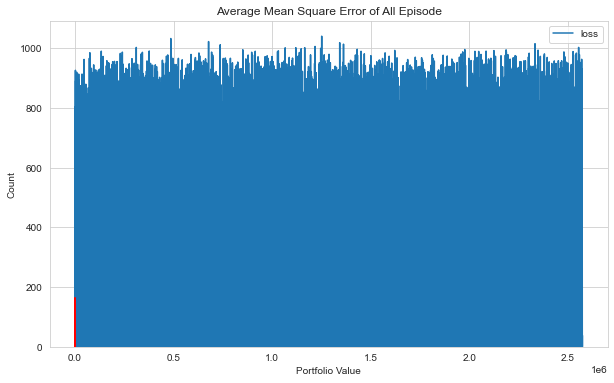

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

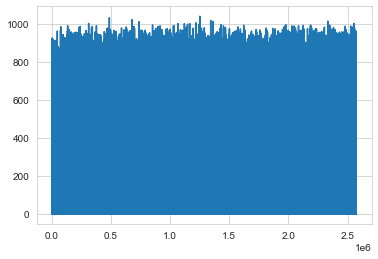

In [5]:
plt.plot(agent.model.losses)

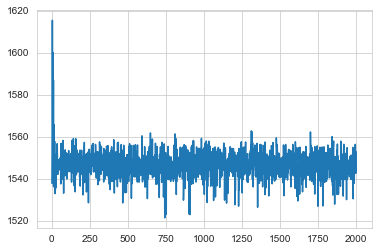

In [6]:
plt.plot(portfolio_value)

episode end value: 1072.80, duration: 0:00:00.196062
Sell: 701 times, Buy: 587 times


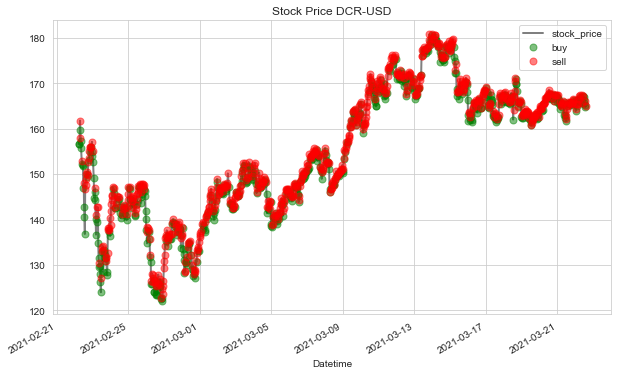

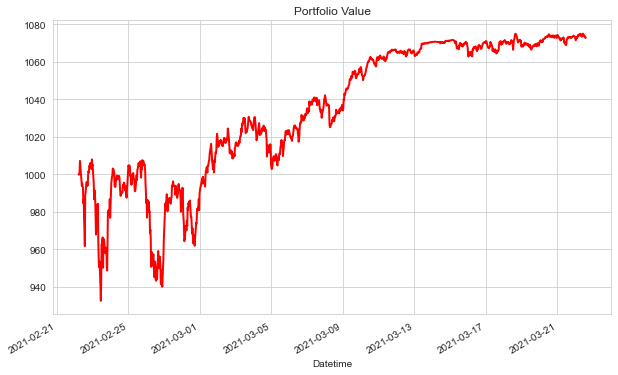

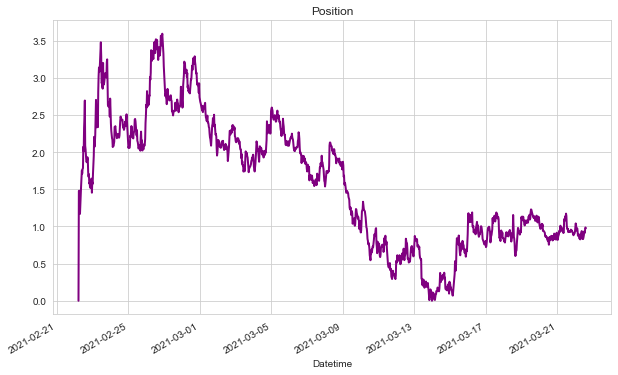

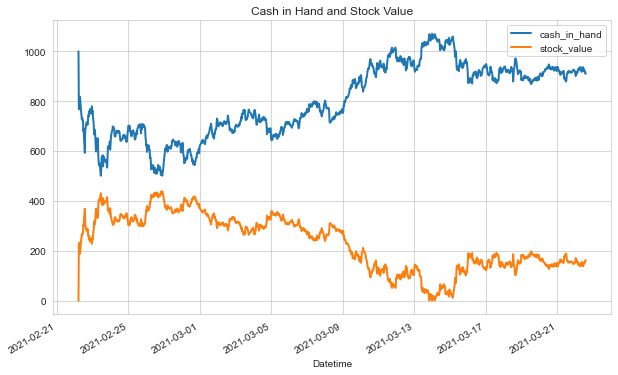

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: DCR-USD
Start: 2021-02-22 05:30:00+00:00  End: 2021-03-22 14:30:00+00:00
Compound Annual Growth Rate: 1.38 %
Volatility: 0.0447
shape ratio: 0.0634
Maximun drawdown: -7.47 %
Calmar ratio: 0.1852
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 1.01 %
Volatility (benchmark): 0.1379
shape ratio: -0.0066
Maximun drawdown: -24.53 %
Calmar ratio (benchmark): 0.0411


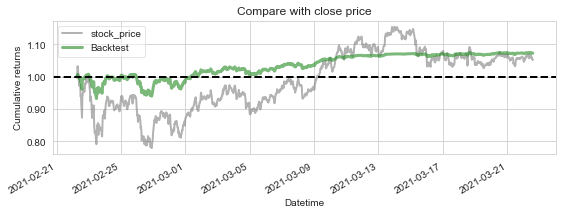

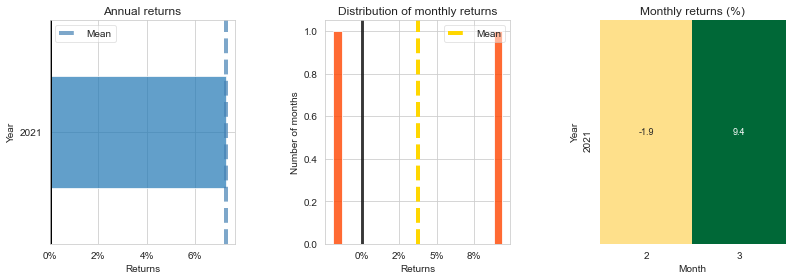

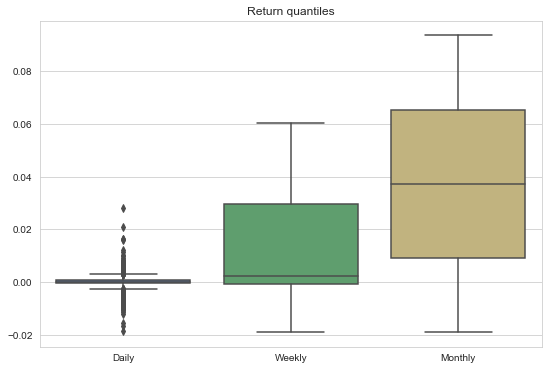

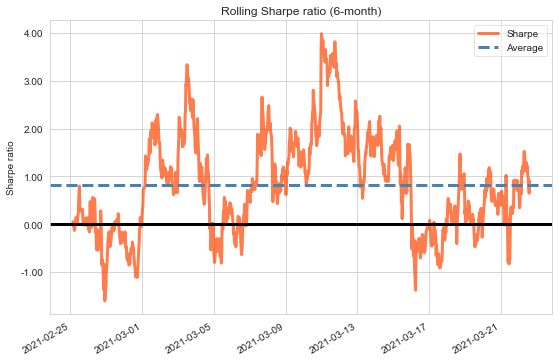

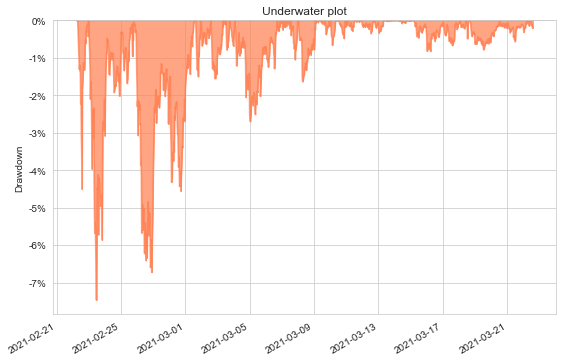

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')